In [1]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pokeballs = ['pokeball','ultraball','fastball','heavyball']
with open('pokemon_clean.json') as f:
    pokes = json.load(f)
factory = PokemonFactory('pokemon_clean.json')

Quiero crear un df con muchos datos, donde varie el HP%, el nivel, el statusEffect y la pokebola!

for nivel(1,100)
    for hp (0.01,1)
        for statusEffect.None
        for statusEffect
        

In [3]:
aux = []
for pok, detail in pokes.items():
    beast = factory.create(pok,100,StatusEffect.NONE,1) #pokemon con nivel 100 y vida al maximo
    for ball in pokeballs:
        for _ in range(1000):
            success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
            aux.append({'pokemon': pok,'statusEffect':'NONE', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1], 'catch_rate': catch_rate})
    beast = factory.create(pok,100,StatusEffect.FREEZE,1) #pokemon con nivel 100 y vida al maximo
    for ball in pokeballs:
        for _ in range(1000):
            success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
            aux.append({'pokemon': pok,'statusEffect':'FREEZE', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1], 'catch_rate': catch_rate})
    beast = factory.create(pok,100,StatusEffect.BURN,1) #pokemon con nivel 100 y vida al maximo
    for ball in pokeballs:
        for _ in range(1000):
            success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
            aux.append({'pokemon': pok,'statusEffect':'BURN', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1], 'catch_rate': catch_rate})
    beast = factory.create(pok,100,StatusEffect.PARALYSIS,1) #pokemon con nivel 100 y vida al maximo
    for ball in pokeballs:
        for _ in range(1000):
            success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
            aux.append({'pokemon': pok,'statusEffect':'PARALYSIS', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1], 'catch_rate': catch_rate})
    beast = factory.create(pok,100,StatusEffect.POISON,1) #pokemon con nivel 100 y vida al maximo
    for ball in pokeballs:
        for _ in range(1000):
            success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
            aux.append({'pokemon': pok,'statusEffect':'POISON', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1], 'catch_rate': catch_rate})
    beast = factory.create(pok,100,StatusEffect.SLEEP,1) #pokemon con nivel 100 y vida al maximo
    for ball in pokeballs:
        for _ in range(1000):
            success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
            aux.append({'pokemon': pok,'statusEffect':'SLEEP', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1], 'catch_rate': catch_rate})
    
df = pd.DataFrame(aux)
df

,pokemon,statusEffect,pokeball,success,noise,weight,speed,catch_rate
0,jolteon,NONE,pokeball,False,0.05,54.0,130,0.058423
1,jolteon,NONE,pokeball,False,0.05,54.0,130,0.054558
2,jolteon,NONE,pokeball,False,0.05,54.0,130,0.057512
3,jolteon,NONE,pokeball,False,0.05,54.0,130,0.059102
4,jolteon,NONE,pokeball,False,0.05,54.0,130,0.058625
...,...,...,...,...,...,...,...,...
287995,dragonite,SLEEP,heavyball,False,0.05,210.0,80,0.059268
287996,dragonite,SLEEP,heavyball,False,0.05,210.0,80,0.068048
287997,dragonite,SLEEP,heavyball,False,0.05,210.0,80,0.060275
287998,dragonite,SLEEP,heavyball,False,0.05,210.0,80,0.064031


In [4]:
probabilidades = df.groupby(['statusEffect'])['success'].mean()
probabilidades

statusEffect
BURN         0.125500
FREEZE       0.166104
NONE         0.081187
PARALYSIS    0.125583
POISON       0.123479
SLEEP        0.163542
Name: success, dtype: float64

Claramente todos los statusEffects tienen un efecto positivo en la chance de capturar al pokemon! Donde Sleep y Freeze tienen el mayor efecto.

In [5]:
aux = []
for pok, detail in pokes.items():
    for life in np.arange(0.01, 1.01, 0.01):
        beast = factory.create(pok,100,StatusEffect.NONE,life) #pokemon con nivel 100 y vida al maximo
        for ball in pokeballs:
            for _ in range(1000):
                success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
                aux.append({'pokemon': pok,'statusEffect':'NONE', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1],'healthPercentage':life, 'health':beast.current_hp,  'catch_rate': catch_rate})
df2 = pd.DataFrame(aux)
df2

,pokemon,statusEffect,pokeball,success,noise,weight,speed,healthPercentage,health,catch_rate
0,jolteon,NONE,pokeball,False,0.05,54.0,130,0.01,1,0.177661
1,jolteon,NONE,pokeball,False,0.05,54.0,130,0.01,1,0.178147
2,jolteon,NONE,pokeball,False,0.05,54.0,130,0.01,1,0.190134
3,jolteon,NONE,pokeball,True,0.05,54.0,130,0.01,1,0.183859
4,jolteon,NONE,pokeball,False,0.05,54.0,130,0.01,1,0.178553
...,...,...,...,...,...,...,...,...,...,...
4799995,dragonite,NONE,heavyball,False,0.05,210.0,80,1.00,111,0.032677
4799996,dragonite,NONE,heavyball,False,0.05,210.0,80,1.00,111,0.033172
4799997,dragonite,NONE,heavyball,False,0.05,210.0,80,1.00,111,0.033115
4799998,dragonite,NONE,heavyball,False,0.05,210.0,80,1.00,111,0.032620


In [6]:
probs = df2.groupby(['pokeball','health'])['success'].mean()
probs

pokeball   health
fastball   1         0.310917
           2         0.317833
           3         0.315083
           4         0.306750
           5         0.314833
                       ...   
ultraball  109       0.121444
           110       0.105600
           111       0.126750
           112       0.134000
           113       0.063000
Name: success, Length: 452, dtype: float64

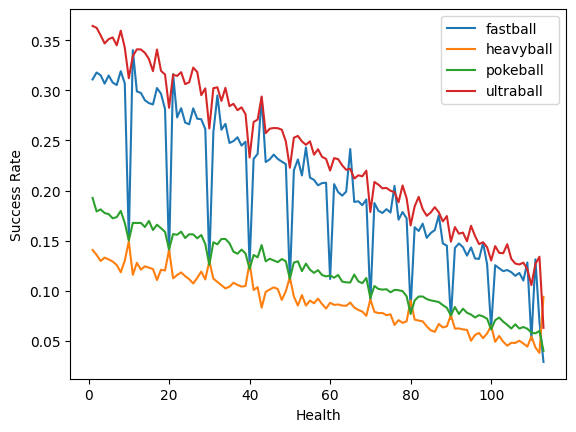

In [7]:
df_reset = probs.reset_index()
pokeballs = df_reset['pokeball'].unique()

for pokeball in pokeballs:
    subset = df_reset[df_reset['pokeball'] == pokeball]
    plt.plot(subset['health'], subset['success'], label=pokeball)

plt.xlabel('Health')
plt.ylabel('Success Rate')
plt.legend()
plt.show()

Muy claro!

 c) 
¿Qu´e par´ametros son los que m´as afectan la probabilidad de captura?

Se puede observar de este grafico que menor vida de un pokemon implica mas facilidad para capturarlo. A su vez vimos antes que los statusEffect tienen un efecto x2 o x1.5 en el success_rate. Muy pequena vida puede tener una mayor eficacia para la captura pero no necesariamente es facil de conseguir (es dificil no matar un pokemon cerca de 0% de vida).


In [8]:
for status in StatusEffect:
    print(status.name)

POISON
BURN
PARALYSIS
SLEEP
FREEZE
NONE


In [9]:
aux = []
for pok, detail in pokes.items():
    for life in np.arange(0.01, 1.01, 0.1):
        beast = factory.create(pok,100,StatusEffect.NONE,life) #pokemon con nivel 100 y vida al maximo
        for ball in pokeballs:
            for _ in range(1000):
                success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
                aux.append({'pokemon': pok,'statusEffect':'NONE', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1],'healthPercentage':life, 'health':beast.current_hp,  'catch_rate': catch_rate})
        beast = factory.create(pok,100,StatusEffect.FREEZE,life) #pokemon con nivel 100 y vida al maximo
        for ball in pokeballs:
            for _ in range(1000):
                success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
                aux.append({'pokemon': pok,'statusEffect':'FREEZE', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1],'healthPercentage':life, 'health':beast.current_hp,  'catch_rate': catch_rate})
        beast = factory.create(pok,100,StatusEffect.BURN,life) #pokemon con nivel 100 y vida al maximo
        for ball in pokeballs:
            for _ in range(1000):
                success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
                aux.append({'pokemon': pok,'statusEffect':'BURN', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1],'healthPercentage':life, 'health':beast.current_hp,  'catch_rate': catch_rate})
        beast = factory.create(pok,100,StatusEffect.PARALYSIS,life) #pokemon con nivel 100 y vida al maximo
        for ball in pokeballs:
            for _ in range(1000):
                success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
                aux.append({'pokemon': pok,'statusEffect':'PARALYSIS', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1],'healthPercentage':life, 'health':beast.current_hp,  'catch_rate': catch_rate})
        beast = factory.create(pok,100,StatusEffect.POISON,life) #pokemon con nivel 100 y vida al maximo
        for ball in pokeballs:
            for _ in range(1000):
                success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
                aux.append({'pokemon': pok,'statusEffect':'POISON', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1],'healthPercentage':life, 'health':beast.current_hp,  'catch_rate': catch_rate})
        beast = factory.create(pok,100,StatusEffect.SLEEP,life) #pokemon con nivel 100 y vida al maximo
        for ball in pokeballs:
            for _ in range(1000):
                success, catch_rate = attempt_catch(beast,ball,0.05) #attempt_success
                aux.append({'pokemon': pok,'statusEffect':'SLEEP', 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1],'healthPercentage':life, 'health':beast.current_hp,  'catch_rate': catch_rate})
    
df3 = pd.DataFrame(aux)
df3

,pokemon,statusEffect,pokeball,success,noise,weight,speed,healthPercentage,health,catch_rate
0,jolteon,NONE,fastball,True,0.05,54.0,130,0.01,1,0.739455
1,jolteon,NONE,fastball,True,0.05,54.0,130,0.01,1,0.718153
2,jolteon,NONE,fastball,False,0.05,54.0,130,0.01,1,0.653570
3,jolteon,NONE,fastball,False,0.05,54.0,130,0.01,1,0.698369
4,jolteon,NONE,fastball,True,0.05,54.0,130,0.01,1,0.723150
...,...,...,...,...,...,...,...,...,...,...
2879995,dragonite,SLEEP,ultraball,False,0.05,210.0,80,0.91,101,0.299582
2879996,dragonite,SLEEP,ultraball,False,0.05,210.0,80,0.91,101,0.268762
2879997,dragonite,SLEEP,ultraball,False,0.05,210.0,80,0.91,101,0.277881
2879998,dragonite,SLEEP,ultraball,True,0.05,210.0,80,0.91,101,0.320452


In [10]:
proba = df3.groupby(['statusEffect','healthPercentage'])['success'].mean()
proba

statusEffect  healthPercentage
BURN          0.01                0.364958
              0.11                0.344687
              0.21                0.323062
              0.31                0.295833
              0.41                0.270667
              0.51                0.248875
              0.61                0.218604
              0.71                0.197792
              0.81                0.173667
              0.91                0.148667
FREEZE        0.01                0.464500
              0.11                0.435229
              0.21                0.412500
              0.31                0.386854
              0.41                0.356333
              0.51                0.332062
              0.61                0.295479
              0.71                0.264042
              0.81                0.228771
              0.91                0.197000
NONE          0.01                0.246708
              0.11                0.229708
              0.21     

Ahora para cada pokebola haremos un grafico para cada estado sobre la vida


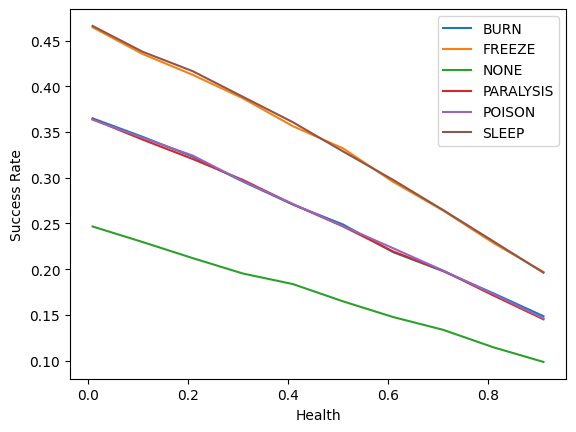

In [11]:
df_reset = proba.reset_index()
effects = df_reset['statusEffect'].unique()

for effect in effects:
    subset = df_reset[df_reset['statusEffect'] == effect]
    plt.plot(subset['healthPercentage'], subset['success'], label=effect)

plt.xlabel('Health')
plt.ylabel('Success Rate')
plt.legend()
plt.show()

In [12]:
aux = []

In [13]:
aux = []
for pok, detail in pokes.items():
    for life in np.arange(0.01, 1.01, 0.1):
        for lvl in np.arange(1,100,5):
            for status in StatusEffect:
                beast = factory.create(pok, lvl, status, life)
                for ball in pokeballs:
                    for _ in range(100):
                        success, catch_rate = attempt_catch(beast, ball, 0.05)
                        aux.append({'pokemon': pok,'statusEffect':status.name, 'pokeball': ball, 'success': success, 'noise': '0.05', 'weight': beast.weight, 'speed': beast.stats[-1],'healthPercentage':life, 'health':beast.current_hp, 'level': lvl,  'catch_rate': catch_rate})
df4 = pd.DataFrame(aux)
df4

,pokemon,statusEffect,pokeball,success,noise,weight,speed,healthPercentage,health,level,catch_rate
0,jolteon,POISON,fastball,True,0.05,54.0,130,0.01,1,1,1.000000
1,jolteon,POISON,fastball,True,0.05,54.0,130,0.01,1,1,1.000000
2,jolteon,POISON,fastball,True,0.05,54.0,130,0.01,1,1,0.945151
3,jolteon,POISON,fastball,True,0.05,54.0,130,0.01,1,1,1.000000
4,jolteon,POISON,fastball,True,0.05,54.0,130,0.01,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
5759995,dragonite,NONE,ultraball,False,0.05,210.0,80,0.91,97,96,0.120928
5759996,dragonite,NONE,ultraball,False,0.05,210.0,80,0.91,97,96,0.145237
5759997,dragonite,NONE,ultraball,False,0.05,210.0,80,0.91,97,96,0.142003
5759998,dragonite,NONE,ultraball,False,0.05,210.0,80,0.91,97,96,0.137273


In [18]:
prob = df4.groupby(['level','healthPercentage'])['success'].mean()
prob

level  healthPercentage
1      0.01                0.359063
       0.11                0.367465
       0.21                0.344653
       0.31                0.317535
       0.41                0.297639
                             ...   
96     0.51                0.258507
       0.61                0.234410
       0.71                0.207951
       0.81                0.186285
       0.91                0.160312
Name: success, Length: 200, dtype: float64

A simple vista el efecto del nivel es muy pequeno

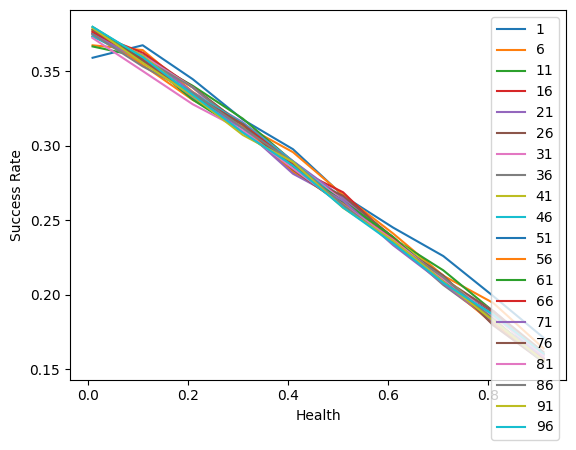

In [19]:
df_reset = prob.reset_index()
effects = df_reset['level'].unique()

for effect in effects:
    subset = df_reset[df_reset['level'] == effect]
    plt.plot(subset['healthPercentage'], subset['success'], label=effect)

plt.xlabel('Health')
plt.ylabel('Success Rate')
plt.legend()
plt.show()

In [20]:
prob_2 = df4.groupby(['level'])['success'].mean()
prob_2

level
1     0.279351
6     0.275632
11    0.274017
16    0.273559
21    0.273618
26    0.273806
31    0.272021
36    0.271472
41    0.272135
46    0.271899
51    0.271351
56    0.269962
61    0.271146
66    0.271410
71    0.270069
76    0.270896
81    0.269705
86    0.270861
91    0.270535
96    0.271622
Name: success, dtype: float64

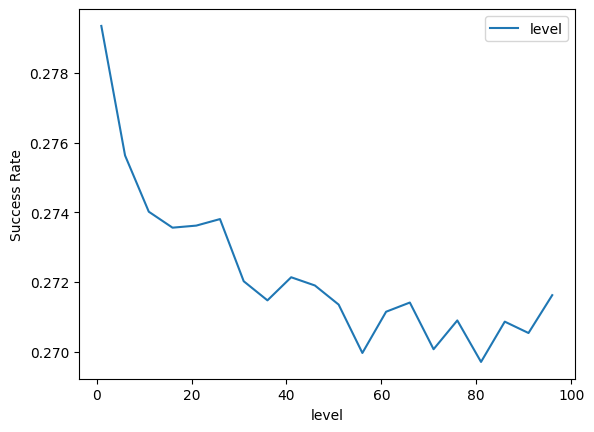

In [26]:
df_reset = prob_2.reset_index()
plt.plot(df_reset['level'],df_reset['success'], label='level')


plt.xlabel('level')
plt.ylabel('Success Rate')
plt.legend()
plt.show()